<a href="https://colab.research.google.com/github/madol-abraham/smartflow_summative/blob/main/My_summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

# **SmartFlow**

# Objective

The primary goal of this project is to develop a smart irrigation system that leverages machine learning to predict whether irrigation is required based on environmental and soil conditions. By analyzing key factors such as soil moisture, temperature, humidity, rainfall, and crop type, the system provides data-driven recommendations to optimize water usage in agriculture. This technology aims to address critical challenges faced by farmers, particularly in regions like South Sudan, where water scarcity and inefficient irrigation practices often lead to high production costs and low crop yields.

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# The Dataset

The dataset used for this project was obtained from Kaggle and combined with another dataset to meet the specific requirements of the project. It includes 8 key features and a target variable indicating whether irrigation is needed or not. Below is a brief description of the dataset:

Features:
Soil Moisture: Measures the water content in the soil (percentage).

Temperature: Records the ambient temperature (°C).

Time: Tracks the time of day (hours).

Wind Speed: Measures the speed of wind (Km/h).

Air Humidity: Measures the moisture level in the air (percentage).

Rainfall: Records the amount of precipitation (mm).

Soil Type: Categorizes the type of soil (e.g., sandy, loamy, clay).

Crop Type: Specifies the type of crop being grown (e.g., maize, wheat, vegetables).

Target Variable:
Irrigation Needed:

0: Irrigation Not Needed.

1: Irrigation Needed.

Dataset Characteristics:
Source: The dataset was initially obtained from Kaggle and combined with another dataset to enhance its relevance and completeness.

Preprocessing: The combined dataset was cleaned, normalized, and encoded (for categorical variables) to ensure compatibility with machine learning algorithms.

In [3]:
# load primary dataset
df1 = pd.read_csv('TARP.csv')
# load secondary dataset
df2 =pd.read_csv('smart_irrigation_dataset.csv')


In [4]:
# Repeat the secondary dataset to match the length of the primary dataset
repeats = len(df1) // len(df2) + 1
df2_repeated = pd.concat([df2] * repeats, ignore_index=True).iloc[:len(df1)]

In [5]:
# Reset indices to align them
df1.reset_index(drop=True, inplace=True)
df2_repeated.reset_index(drop=True, inplace=True)

In [6]:
df2.head()

Soil Moisture (%)  Temperature (°C)  Humidity (%)  Rainfall (mm)  \
0          18.108904         19.628323     45.702341      33.635150   
1          38.275001         28.547524     44.818728      39.834070   
2          30.619788         36.823646     84.375275      12.523395   
3          25.953047         33.305622     44.972772      31.243705   
4          10.460652         35.164029     46.316984      28.587299   

   Wind Speed (km/h)  Solar Radiation (W/m²)  Evapotranspiration (mm/day)  \
0          11.439918              454.271968                     6.482570   
1          16.108647              526.092093                     1.723864   
2          15.203219              869.092654                     8.723946   
3           3.077998              406.003947                     6.131162   
4           2.984989              882.684716                     1.572039   

  Soil Type Crop Type Growth Stage  Root Depth (cm)  \
0     Loamy   Soybean    Flowering        50.704706   
1      Clay   Soybean    Flowering        11.449740   
2     Loamy      Rice  Germination        20.534057   
3     Loamy    Tomato     Fruiting        26.643342   
4      Clay     Maize  Germination        20.222859   

   Previous Irrigation (days)  Irrigation Needed  
0                           1                  0  
1                           3                  0  
2                           8                  0  
3                           3                  0  
4                           4                  0

In [7]:
# Select the desired columns from the repeated secondary dataset
selected_columns = df2_repeated[['Soil Type', 'Crop Type']]

In [8]:
# Concatenate the selected columns to the main dataset
df3 = pd.concat([df1, selected_columns], axis=1)

In [9]:
df3.head()

Soil Moisture  Temperature   Soil Humidity  Time  Air temperature (C)  \
0             54           22              70    21                19.52   
1             12           20              40   104                19.49   
2             34           26              35    62                19.47   
3              7           44              44    93                19.54   
4             50           38              23    92                19.61   

   Wind speed (Km/h)  Air humidity (%)  Wind gust (Km/h)  Pressure (KPa)  \
0               2.13             55.04              6.30          101.50   
1               2.01             55.17             10.46          101.50   
2               1.90             55.30             14.63          101.51   
3               2.28             54.20             16.08          101.51   
4               2.66             53.09             17.52          101.51   

         ph    rainfall     N     P     K Status Soil Type Crop Type  
0  6.502985  202.935536  90.0  42.0  43.0     ON     Loamy   Soybean  
1  7.038096  226.655537  85.0  58.0  41.0    OFF      Clay   Soybean  
2  7.840207  263.964248  60.0  55.0  44.0     ON     Loamy      Rice  
3  6.980401  242.864034  74.0  35.0  40.0    OFF     Loamy    Tomato  
4  7.628473  262.717340  78.0  42.0  42.0    OFF      Clay     Maize

In [10]:
#
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2    Soil Humidity       100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  object 
 15  Soil Type         

In [11]:
df3.columns

Index(['Soil Moisture', 'Temperature', ' Soil Humidity', 'Time',
       'Air temperature (C)', 'Wind speed (Km/h)', 'Air humidity (%)',
       'Wind gust (Km/h)', 'Pressure (KPa)', 'ph', 'rainfall', 'N', 'P', 'K',
       'Status', 'Soil Type', 'Crop Type'],
      dtype='object')

In [12]:
df3.shape

(100000, 17)

In [13]:
# remove redundant columns
columns_to_remove = [' Soil Humidity', 'Air temperature (C)', 'N', 'P', 'K','Wind gust (Km/h)', 'Pressure (KPa)', 'ph', 'Status']
df3.drop(columns=columns_to_remove, inplace=True)


In [14]:
#display the updated DataFrame
df3.head()

Soil Moisture  Temperature  Time  Wind speed (Km/h)  Air humidity (%)  \
0             54           22    21               2.13             55.04   
1             12           20   104               2.01             55.17   
2             34           26    62               1.90             55.30   
3              7           44    93               2.28             54.20   
4             50           38    92               2.66             53.09   

     rainfall Soil Type Crop Type  
0  202.935536     Loamy   Soybean  
1  226.655537      Clay   Soybean  
2  263.964248     Loamy      Rice  
3  242.864034     Loamy    Tomato  
4  262.717340      Clay     Maize

In [15]:
df3.describe()

Soil Moisture    Temperature           Time  Wind speed (Km/h)  \
count  100000.000000  100000.000000  100000.000000       23995.000000   
mean       45.484070      22.536100      55.253650           9.896898   
std        25.993998      13.251352      32.093033           4.325666   
min         1.000000       0.000000       0.000000           0.000000   
25%        23.000000      11.000000      28.000000           6.830000   
50%        45.000000      23.000000      55.000000           9.530000   
75%        68.000000      34.000000      83.000000          12.460000   
max        90.000000      45.000000     110.000000          31.360000   

       Air humidity (%)     rainfall  
count      23995.000000  2200.000000  
mean          58.521052   103.463655  
std           30.073448    54.958389  
min            0.590000    20.211267  
25%           33.980000    64.551686  
50%           61.310000    94.867624  
75%           86.360000   124.267508  
max           96.000000   298.560117

In [16]:
df3.isnull().sum()

Soil Moisture            0
Temperature              0
Time                     0
Wind speed (Km/h)    76005
Air humidity (%)     76005
rainfall             97800
Soil Type                0
Crop Type                0
dtype: int64

In [17]:
df3.shape

(100000, 8)

In [18]:
print(df3.columns)


Index(['Soil Moisture', 'Temperature', 'Time', 'Wind speed (Km/h)',
       'Air humidity (%)', 'rainfall', 'Soil Type', 'Crop Type'],
      dtype='object')


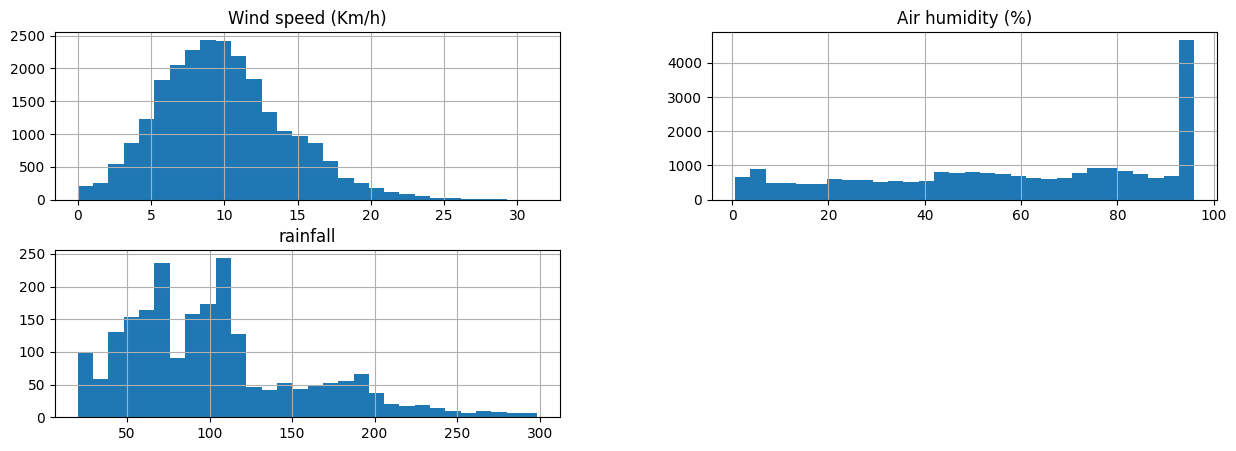

In [19]:
df3[['Wind speed (Km/h)', 'Air humidity (%)', 'rainfall']].hist(bins=30, figsize=(15, 5))
plt.show()


In [20]:
df3['Wind speed (Km/h)'].fillna(df3['Wind speed (Km/h)'].median(), inplace=True)
df3['Air humidity (%)'].fillna(df3['Air humidity (%)'].median(), inplace=True)
df3['rainfall'].fillna(df3['rainfall'].median(), inplace=True)

In [21]:
# convert categorical features to numerical features
df3['Soil Type'] = pd.Categorical(df3['Soil Type']).codes
df3['Crop Type'] = pd.Categorical(df3['Crop Type']).codes

print(df3)

       Soil Moisture  Temperature  Time  Wind speed (Km/h)  Air humidity (%)  \
0                 54           22    21               2.13             55.04   
1                 12           20   104               2.01             55.17   
2                 34           26    62               1.90             55.30   
3                  7           44    93               2.28             54.20   
4                 50           38    92               2.66             53.09   
...              ...          ...   ...                ...               ...   
99995             74            3    83               9.53             61.31   
99996             58           10    82               9.53             61.31   
99997              4           35    17               9.53             61.31   
99998             83           36    15               9.53             61.31   
99999             43           45    33               9.53             61.31   

         rainfall  Soil Type  Crop Type

In [22]:
df3.head()

Soil Moisture  Temperature  Time  Wind speed (Km/h)  Air humidity (%)  \
0             54           22    21               2.13             55.04   
1             12           20   104               2.01             55.17   
2             34           26    62               1.90             55.30   
3              7           44    93               2.28             54.20   
4             50           38    92               2.66             53.09   

     rainfall  Soil Type  Crop Type  
0  202.935536          1          2  
1  226.655537          0          2  
2  263.964248          1          1  
3  242.864034          1          3  
4  262.717340          0          0

In [23]:
# Define multi-threshold rules
def determine_irrigation(row):
    if row['Soil Moisture'] < 12 and row['Temperature'] > 35:
        return 1  # Irrigation needed (high temp and low soil moisture)
    elif row['Soil Moisture'] < 15 and row['Temperature'] > 25 and row['Crop Type'] in ['Rice', 'Tomato']:
        return 1  # Irrigation needed for water-intensive crops in warm conditions
    elif row['Soil Moisture'] < 40 and row['Temperature'] > 20:
        return 1  # Irrigation needed for moderate conditions
    else:
        return 0  # Irrigation not needed

# Apply the rules to create the target variable
df3['Irrigation_Needed'] = df3.apply(determine_irrigation, axis=1)

print(df3)

       Soil Moisture  Temperature  Time  Wind speed (Km/h)  Air humidity (%)  \
0                 54           22    21               2.13             55.04   
1                 12           20   104               2.01             55.17   
2                 34           26    62               1.90             55.30   
3                  7           44    93               2.28             54.20   
4                 50           38    92               2.66             53.09   
...              ...          ...   ...                ...               ...   
99995             74            3    83               9.53             61.31   
99996             58           10    82               9.53             61.31   
99997              4           35    17               9.53             61.31   
99998             83           36    15               9.53             61.31   
99999             43           45    33               9.53             61.31   

         rainfall  Soil Type  Crop Type

In [24]:
# check missinng values
df3.isnull().sum()

Soil Moisture        0
Temperature          0
Time                 0
Wind speed (Km/h)    0
Air humidity (%)     0
rainfall             0
Soil Type            0
Crop Type            0
Irrigation_Needed    0
dtype: int64

In [25]:
df3.shape

(100000, 9)

In [26]:
# duplicate record
duplicates = df3[df3.duplicated()]
print(duplicates)

       Soil Moisture  Temperature  Time  Wind speed (Km/h)  Air humidity (%)  \
26909             60            8    21               9.53             61.31   
29366             66           22    30               9.53             61.31   
31764             61           44   109               9.53             61.31   
33268             27           20    82               9.53             61.31   
34650             28           30    67               9.53             61.31   
...              ...          ...   ...                ...               ...   
99795             27           10    90               9.53             61.31   
99866             15           16     5               9.53             61.31   
99871             11            7    26               9.53             61.31   
99888             40           43     7               9.53             61.31   
99930             32           22    62               9.53             61.31   

        rainfall  Soil Type  Crop Type 

In [27]:
# Remove duplicates in-place
df3.drop_duplicates(inplace=True)

In [28]:
df3.shape

(99704, 9)

In [29]:
df3.describe()

Soil Moisture   Temperature          Time  Wind speed (Km/h)  \
count   99704.000000  99704.000000  99704.000000       99704.000000   
mean       45.487102     22.538474     55.248947           9.618298   
std        25.995192     13.251876     32.089899           2.127812   
min         1.000000      0.000000      0.000000           0.000000   
25%        23.000000     11.000000     28.000000           9.530000   
50%        45.000000     23.000000     55.000000           9.530000   
75%        68.000000     34.000000     83.000000           9.530000   
max        90.000000     45.000000    110.000000          31.360000   

       Air humidity (%)      rainfall     Soil Type     Crop Type  \
count      99704.000000  99704.000000  99704.000000  99704.000000   
mean          60.638805     95.057298      1.422220      1.977092   
std           14.801099      8.259024      1.124234      1.431910   
min            0.590000     20.211267      0.000000      0.000000   
25%           61.310000     94.867624      0.000000      1.000000   
50%           61.310000     94.867624      1.000000      2.000000   
75%           61.310000     94.867624      2.000000      3.000000   
max           96.000000    298.560117      3.000000      4.000000   

       Irrigation_Needed  
count       99704.000000  
mean            0.235868  
std             0.424542  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000

In [30]:
# correlation
df3.corr()

Soil Moisture  Temperature      Time  Wind speed (Km/h)  \
Soil Moisture           1.000000     0.003696 -0.001983          -0.005095   
Temperature             0.003696     1.000000  0.004580          -0.005375   
Time                   -0.001983     0.004580  1.000000          -0.001968   
Wind speed (Km/h)      -0.005095    -0.005375 -0.001968           1.000000   
Air humidity (%)        0.002575    -0.003686  0.000903          -0.270930   
rainfall               -0.009966    -0.001168  0.004972          -0.001021   
Soil Type               0.002264    -0.003983  0.000084           0.002872   
Crop Type              -0.001346    -0.007741 -0.001046          -0.000964   
Irrigation_Needed      -0.542616     0.438010  0.002595           0.003187   

                   Air humidity (%)  rainfall  Soil Type  Crop Type  \
Soil Moisture              0.002575 -0.009966   0.002264  -0.001346   
Temperature               -0.003686 -0.001168  -0.003983  -0.007741   
Time                       0.000903  0.004972   0.000084  -0.001046   
Wind speed (Km/h)         -0.270930 -0.001021   0.002872  -0.000964   
Air humidity (%)           1.000000 -0.058798  -0.001595   0.001454   
rainfall                  -0.058798  1.000000  -0.002747  -0.005563   
Soil Type                 -0.001595 -0.002747   1.000000   0.018301   
Crop Type                  0.001454 -0.005563   0.018301   1.000000   
Irrigation_Needed         -0.005414  0.003587  -0.006122  -0.002776   

                   Irrigation_Needed  
Soil Moisture              -0.542616  
Temperature                 0.438010  
Time                        0.002595  
Wind speed (Km/h)           0.003187  
Air humidity (%)           -0.005414  
rainfall                    0.003587  
Soil Type                  -0.006122  
Crop Type                  -0.002776  
Irrigation_Needed           1.000000

<Axes: >

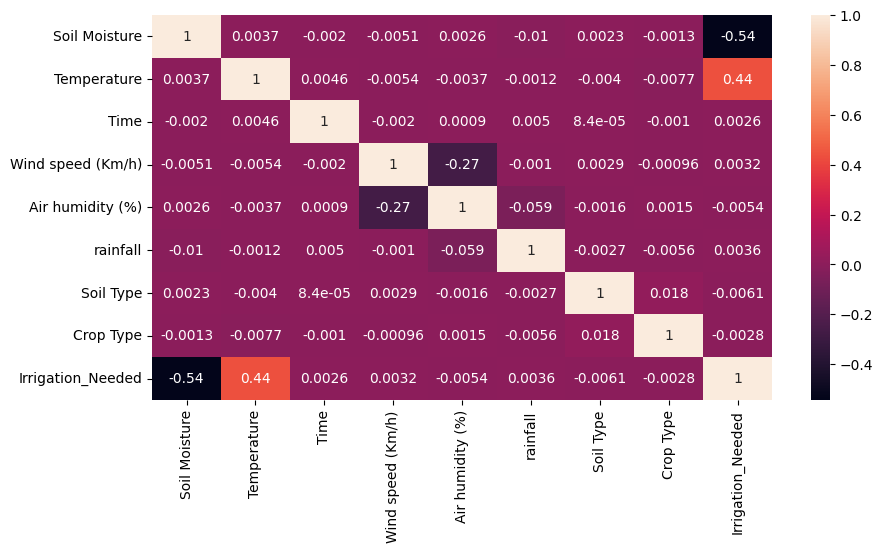

In [31]:
#plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr(), annot=True)

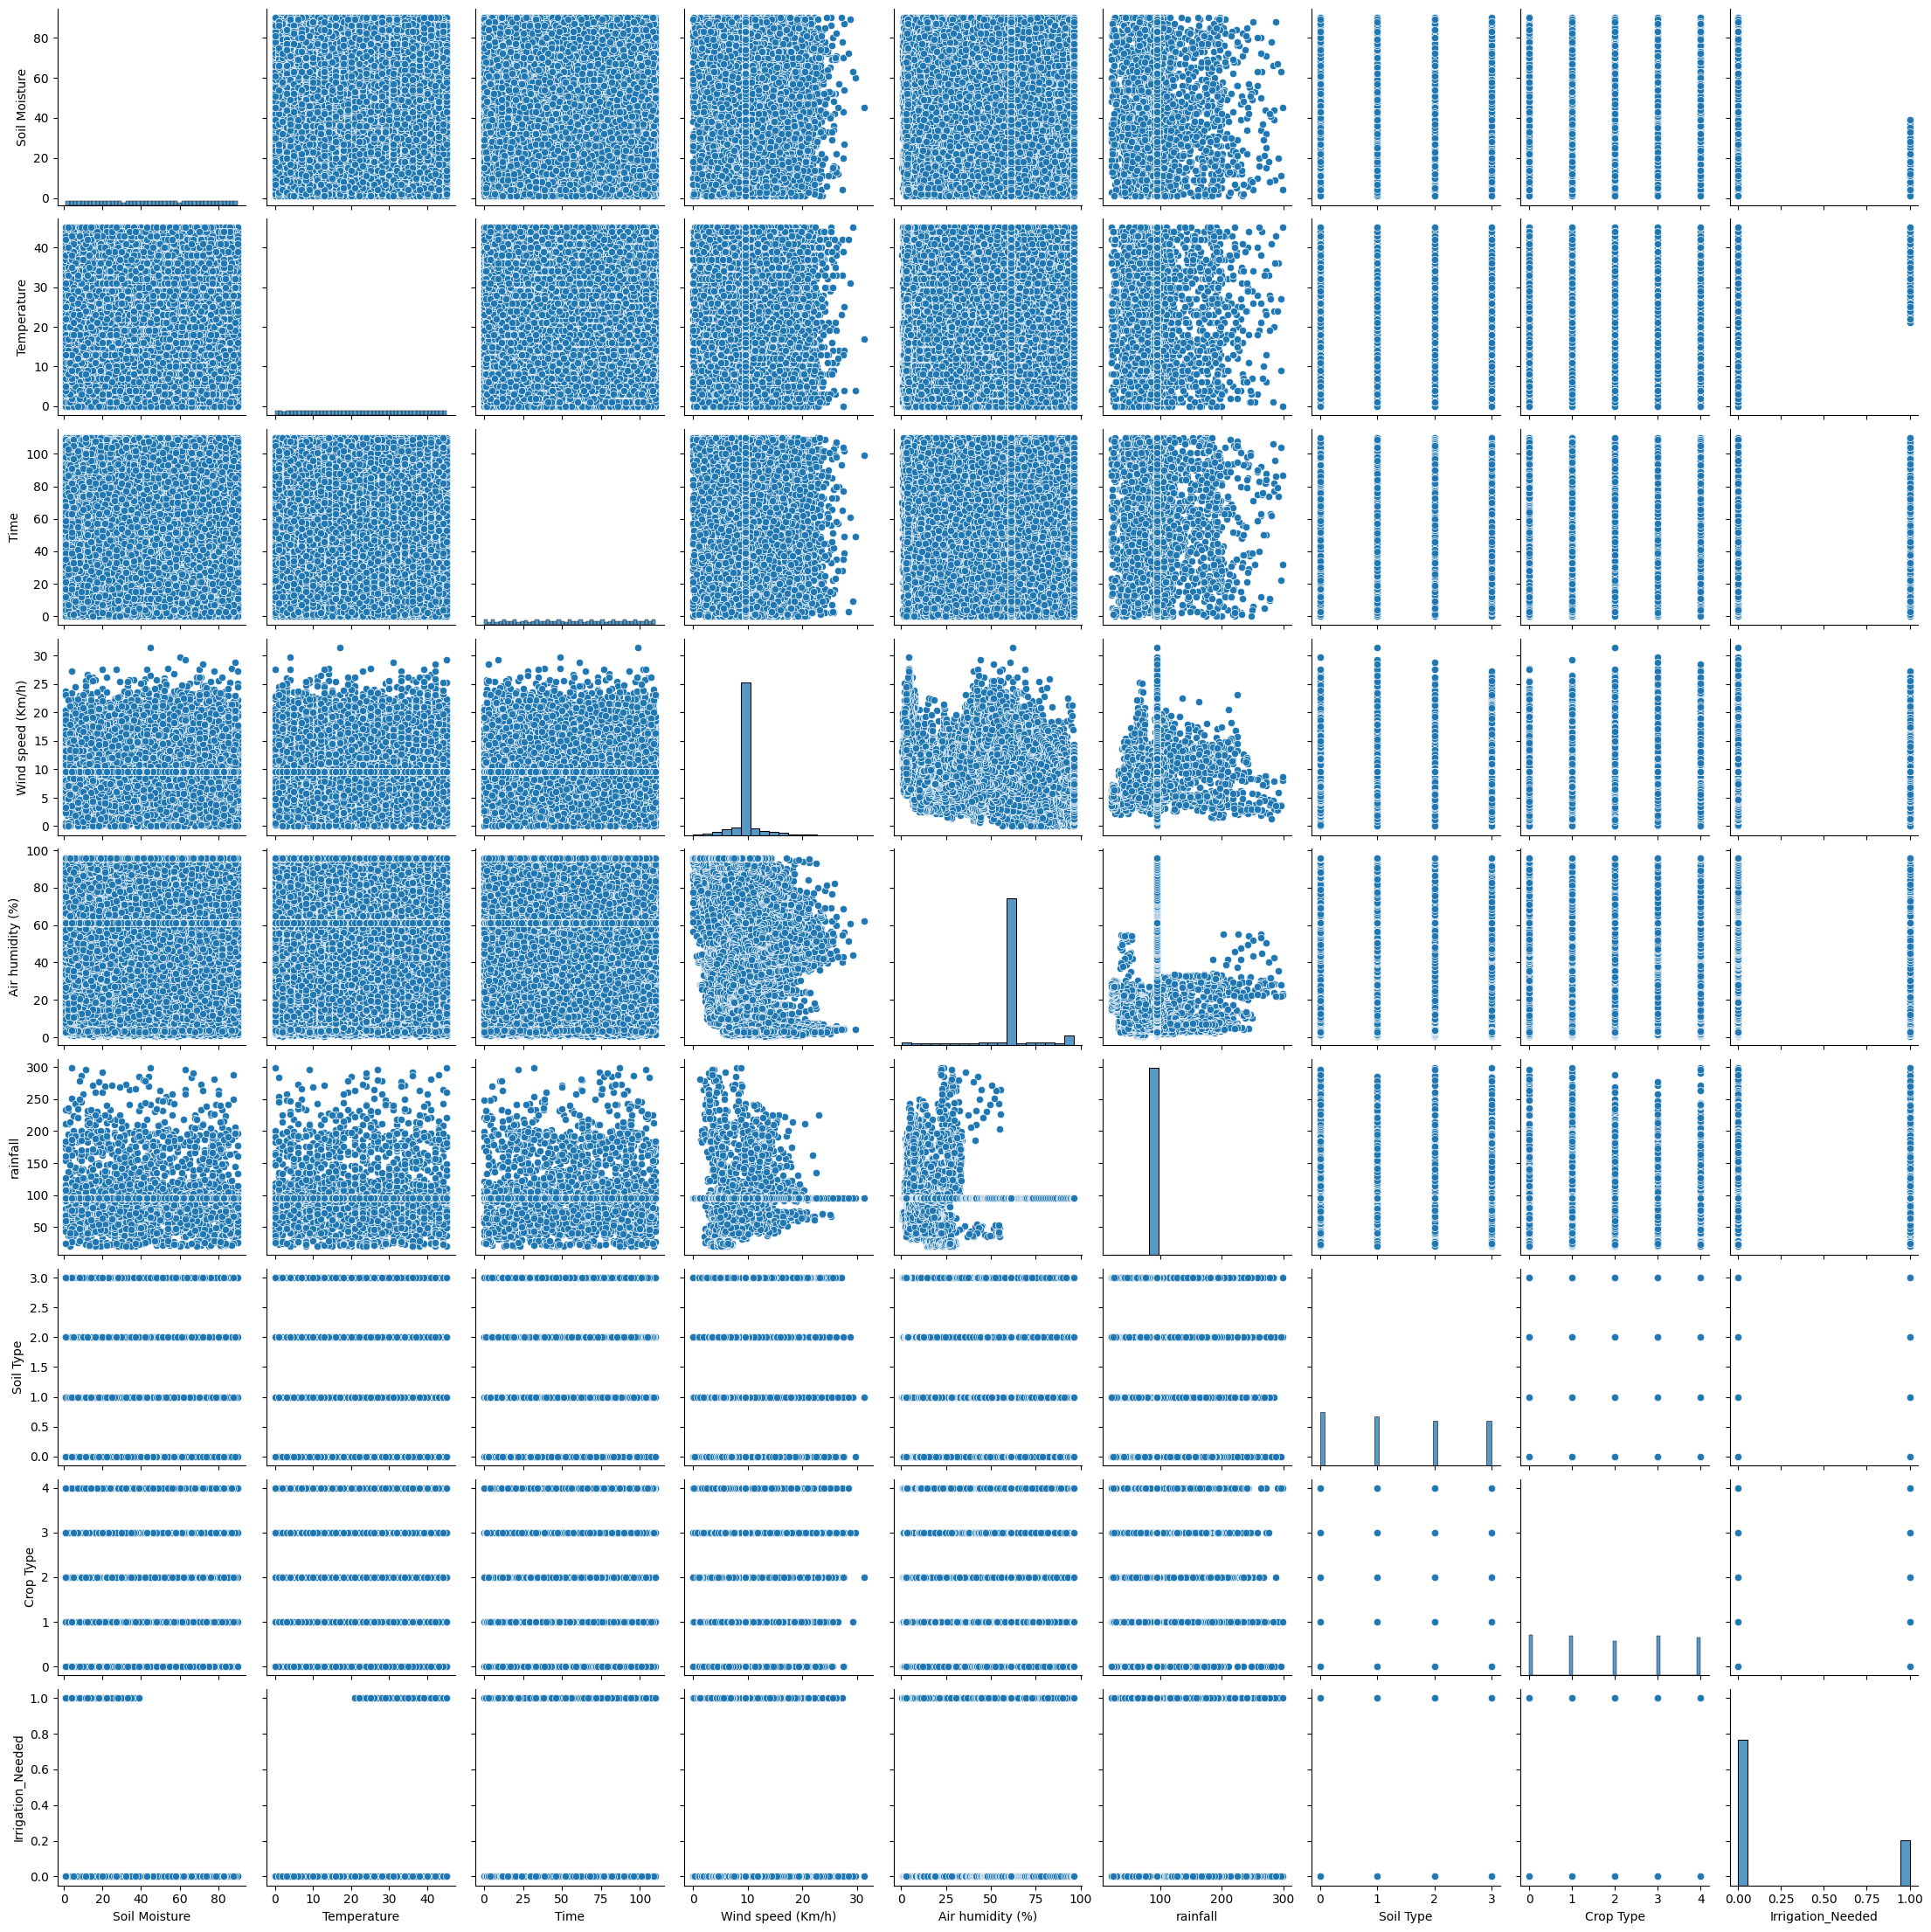

In [32]:
# univariate, bivariate, multivariate analysis
sns.pairplot(df3)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df3)
scaled_df3 = pd.DataFrame(scaled_data,
                         columns=df3.columns)
print(scaled_df3.head())

   Soil Moisture  Temperature      Time  Wind speed (Km/h)  Air humidity (%)  \
0       0.327481    -0.040634 -1.067287          -3.519265         -0.378271   
1      -1.288210    -0.191557  1.519210          -3.575662         -0.369488   
2      -0.441896     0.261212  0.210380          -3.627358         -0.360705   
3      -1.480554     1.619517  1.176421          -3.448770         -0.435024   
4       0.173606     1.166748  1.145259          -3.270182         -0.510019   

    rainfall  Soil Type  Crop Type  Irrigation_Needed  
0  13.061929  -0.375564   0.015998          -0.555585  
1  15.933954  -1.265063   0.015998          -0.555585  
2  20.451303  -0.375564  -0.682373           1.799905  
3  17.896483  -0.375564   0.714370           1.799905  
4  20.300327  -1.265063  -1.380745          -0.555585  


In [34]:
# split the data into training set and test set
from sklearn.model_selection import train_test_split
X = df3.drop('Irrigation_Needed', axis=1)
y = df3['Irrigation_Needed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train

Soil Moisture  Temperature  Time  Wind speed (Km/h)  Air humidity (%)  \
37282             40           20    22               9.53             61.31   
71611             32            3    77               9.53             61.31   
407               17           10    88              13.26              8.27   
49654              2            0    59               9.53             61.31   
63482             17           41    90               9.53             61.31   
...              ...          ...   ...                ...               ...   
6265              28            8   103              11.52             35.16   
54935             25           35    55               9.53             61.31   
76946             55            3    31               9.53             61.31   
860               22           28    35               3.12             52.26   
15795             70           32    65              16.17             84.20   

         rainfall  Soil Type  Crop Type  
37282   94.867624          0          4  
71611   94.867624          2          3  
407    198.829881          0          1  
49654   94.867624          2          3  
63482   94.867624          3          2  
...           ...        ...        ...  
6265    94.867624          2          2  
54935   94.867624          1          2  
76946   94.867624          0          0  
860     53.409060          2          1  
15795   94.867624          2          2  

[79763 rows x 8 columns]

# Neural network model

# Model Architecture:

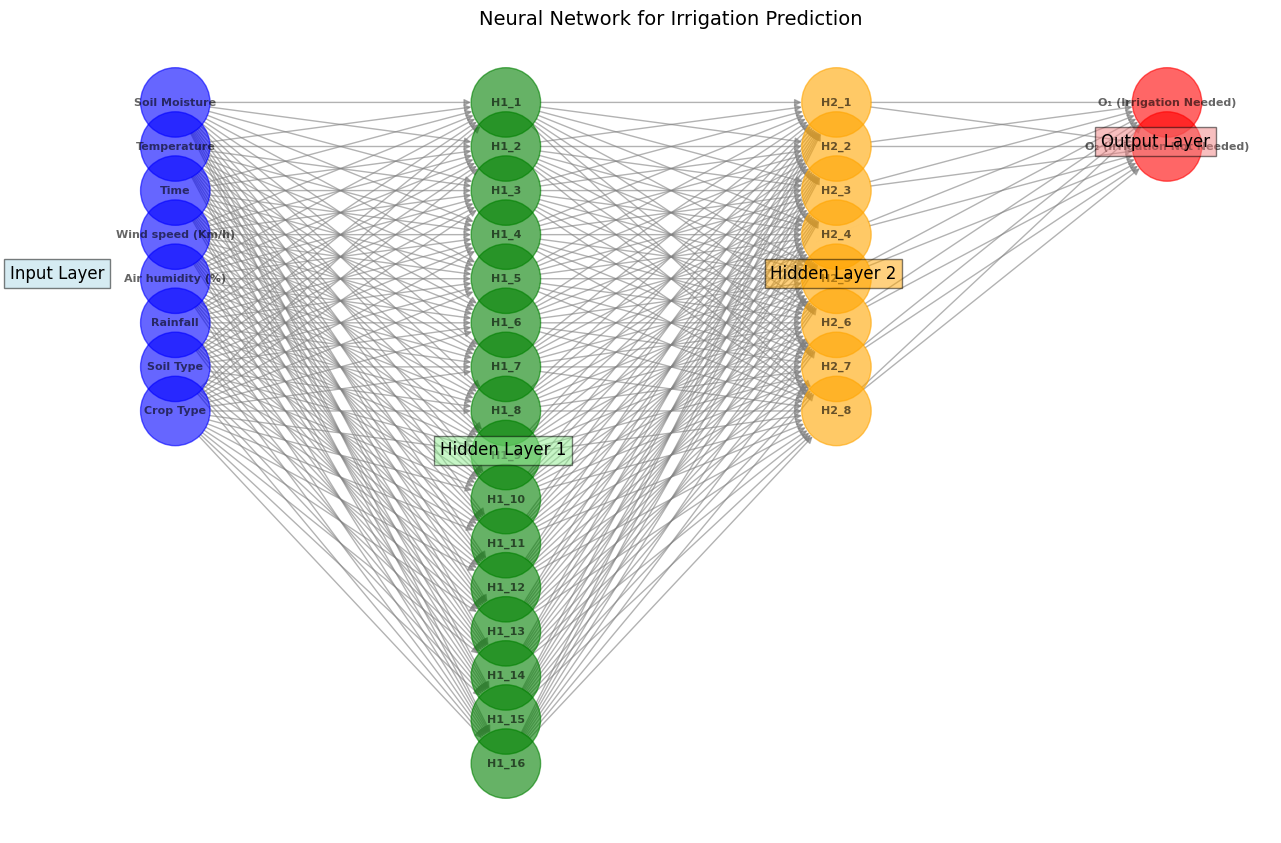

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


def define_model(early_stopping: bool, dropout: float, learning_rate: float, num_features: int, optimization: str = None, regularization: str = None, reg_strength: float = 0.01):
    model = keras.Sequential()

    # Input Layer
    model.add(layers.Dense(16, activation='relu', input_shape=(num_features,)))

    # Hidden Layers (more than 2, each with >8 neurons)
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(128, activation='relu'))

    # Output Layer (Binary classification -> 2 classes)
    model.add(layers.Dense(1, activation='sigmoid'))

    # Optimizer selection (if provided, otherwise use default)
    if optimization:
        optimizers_dict = {
            "adam": optimizers.Adam(learning_rate=learning_rate),
            "sgd": optimizers.SGD(learning_rate=learning_rate),
            "rmsprop": optimizers.RMSprop(learning_rate=learning_rate)
        }
        optimizer = optimizers_dict.get(optimization.lower(), optimizers.Adam(learning_rate=learning_rate))
    else:
        optimizer = "adam"  # Use default TensorFlow optimizer

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Early Stopping Callback (if enabled)
    callback_list = [callbacks.EarlyStopping(monitor='val_loss', patience=5)] if early_stopping else []

    return model, callback_list

In [37]:
num_features = X_train.shape[1]  # Dynamically determine the number of features

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def loss_curve_plot(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')
    plt.show()

# validation acurracy
def accuracy_curve_plot(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

def print_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, np.round(y_pred))
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    #print("Classification Report:\n", classification_report(y_test, np.round(y_pred)))
    # Calculate accuracy, precision, recall, F1 score
    accuracy = accuracy_score(y_test, np.round(y_pred))
    precision = precision_score(y_test, np.round(y_pred))
    recall = recall_score(y_test, np.round(y_pred))
    f1 = f1_score(y_test, np.round(y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

Epoch 1/5
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9227 - loss: 0.1861 - val_accuracy: 0.9803 - val_loss: 0.0487
Epoch 2/5
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9795 - loss: 0.0531 - val_accuracy: 0.9843 - val_loss: 0.0347
Epoch 3/5
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9848 - loss: 0.0407 - val_accuracy: 0.9872 - val_loss: 0.0310
Epoch 4/5
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9869 - loss: 0.0329 - val_accuracy: 0.9872 - val_loss: 0.0355
Epoch 5/5
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9878 - loss: 0.0305 - val_accuracy: 0.9949 - val_loss: 0.0179


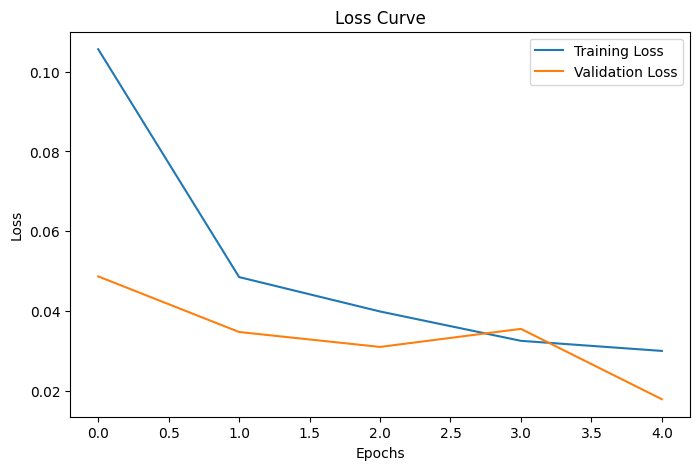

624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step


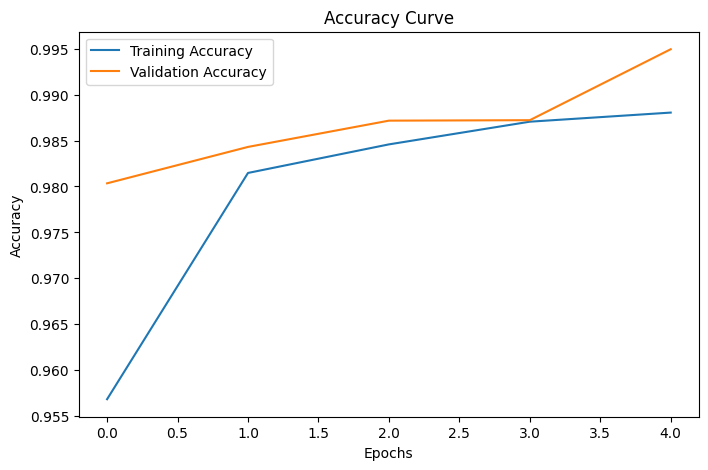

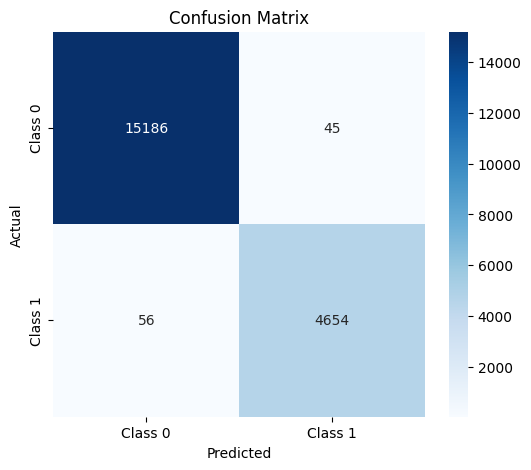

Accuracy: 0.9949
Precision: 0.9904
Recall: 0.9881
F1 Score: 0.9893


In [39]:
#TODO:
# Model 1 - Default optimizer, No early stopping
model1, _ = define_model(False, 0.2, 0.001, num_features)
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)
loss_curve_plot(history1)
accuracy_curve_plot(history1)
y_pred1 = model1.predict(X_test)
print_confusion_matrix(y_test, y_pred1)



In [40]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,749 (131.84 KB)

 Trainable params: 11,249 (43.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,500 (87.89 KB)

Epoch 1/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8992 - loss: 0.2605 - val_accuracy: 0.9683 - val_loss: 0.0717
Epoch 2/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9737 - loss: 0.0759 - val_accuracy: 0.9837 - val_loss: 0.0460
Epoch 3/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9799 - loss: 0.0590 - val_accuracy: 0.9795 - val_loss: 0.0524
Epoch 4/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9804 - loss: 0.0555 - val_accuracy: 0.9885 - val_loss: 0.0344
Epoch 5/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9829 - loss: 0.0474 - val_accuracy: 0.9928 - val_loss: 0.0291
Epoch 6/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9842 - loss: 0.0444 - val_accuracy: 0.9773 - val_loss: 0.0421
Epoch 7/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9842 - loss: 0.0428 - val_accuracy: 0.9834 - val_loss: 0.0385
Epoch 8/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9856 - loss: 0.0398 - 

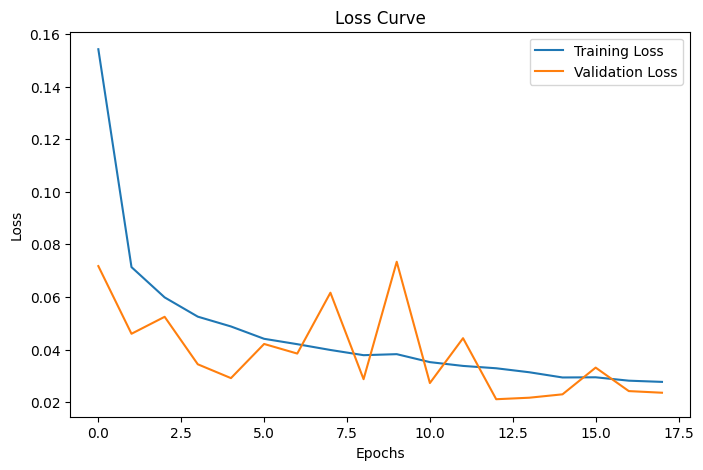

624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step


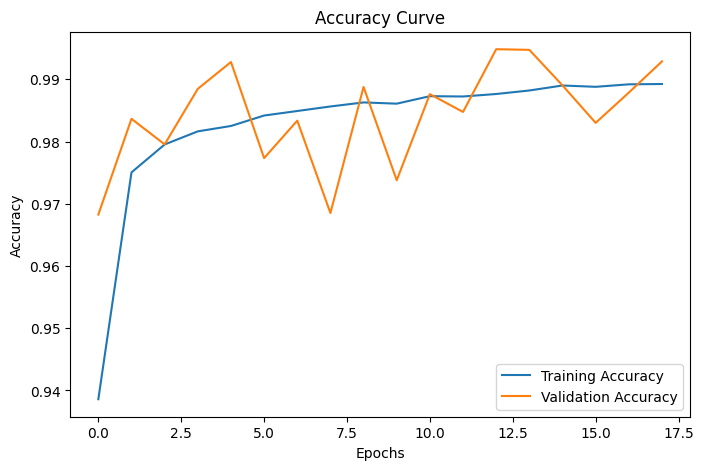

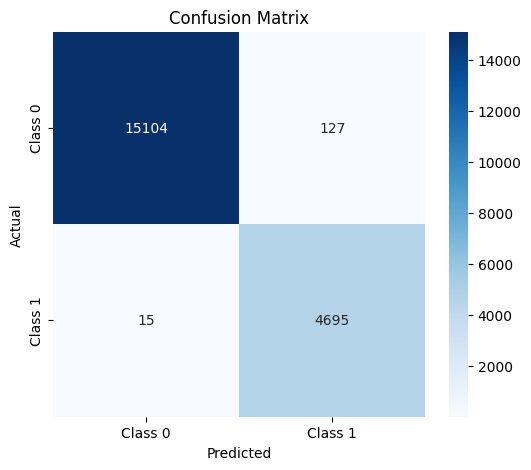

Accuracy: 0.9929
Precision: 0.9737
Recall: 0.9968
F1 Score: 0.9851


In [41]:
# Model 2 - SGD optimizer with early stopping , dropout and learning rate of 0.01
model2, callbacks2 = define_model(True, 0.3, 0.01, num_features, "sgd")
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=callbacks2)
loss_curve_plot(history2)
accuracy_curve_plot(history2)
y_pred2 = model2.predict(X_test)
print_confusion_matrix(y_test, y_pred2)

In [ ]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,249 (43.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/30
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9335 - loss: 0.2152 - val_accuracy: 0.9801 - val_loss: 0.0538
Epoch 2/30
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9758 - loss: 0.0752 - val_accuracy: 0.9679 - val_loss: 0.0925
Epoch 3/30
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9787 - loss: 0.0751 - val_accuracy: 0.9836 - val_loss: 0.0346
Epoch 4/30
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9799 - loss: 0.0687 - val_accuracy: 0.9880 - val_loss: 0.0400
Epoch 5/30
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9791 - loss: 0.0732 - val_accuracy: 0.9692 - val_loss: 0.1756
Epoch 6/30
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9794 - loss: 0.0740 - val_accuracy: 0.9847 - val_loss: 0.0368
Epoch 7/30
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9806 - loss: 0.0701 - val_accuracy: 0.9810 - val_loss: 0.0429
Epoch 8/30
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0718 - 

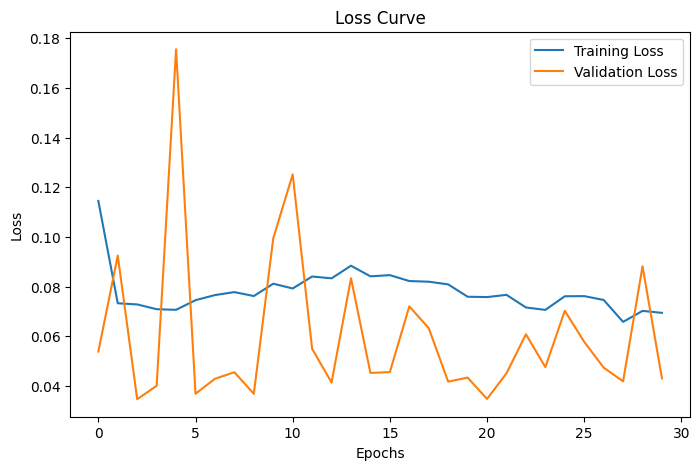

624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step


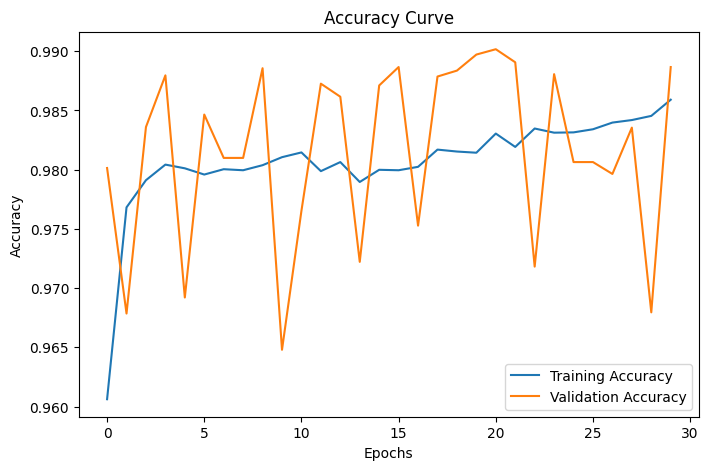

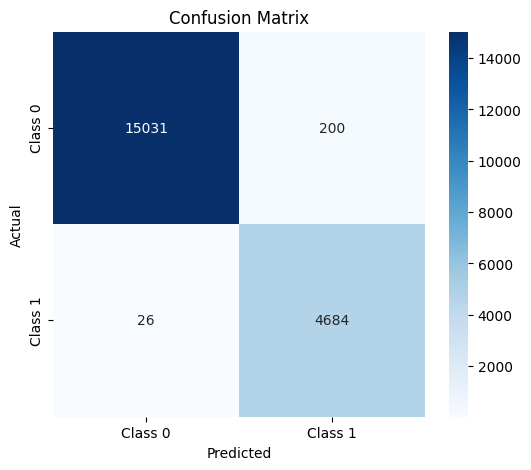

Accuracy: 0.9887
Precision: 0.9590
Recall: 0.9945
F1 Score: 0.9764


In [42]:
# Model 3 - RMSprop optimizer with no early stopping and L2 regularization
model3, _ = define_model(False, 0.25, 0.005, num_features, "rmsprop", "l2", 0.01)
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)
loss_curve_plot(history3)
accuracy_curve_plot(history3)
y_pred3 = model3.predict(X_test)
print_confusion_matrix(y_test, y_pred3)

Epoch 1/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7984 - loss: 0.6764 - val_accuracy: 0.9768 - val_loss: 0.0634
Epoch 2/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9615 - loss: 0.0978 - val_accuracy: 0.9862 - val_loss: 0.0399
Epoch 3/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9754 - loss: 0.0657 - val_accuracy: 0.9821 - val_loss: 0.0488
Epoch 4/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9803 - loss: 0.0541 - val_accuracy: 0.9923 - val_loss: 0.0269
Epoch 5/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9824 - loss: 0.0489 - val_accuracy: 0.9907 - val_loss: 0.0321
Epoch 6/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0465 - val_accuracy: 0.9818 - val_loss: 0.0388
Epoch 7/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9848 - loss: 0.0391 - val_accuracy: 0.9920 - val_loss: 0.0248
Epoch 8/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9855 - loss: 0.0365 - 

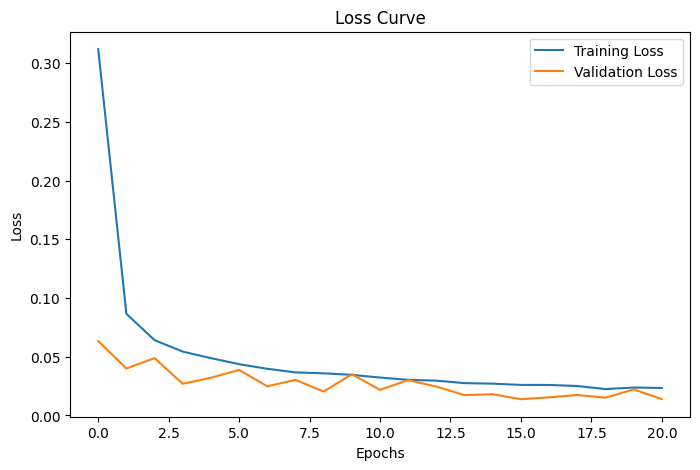

624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step


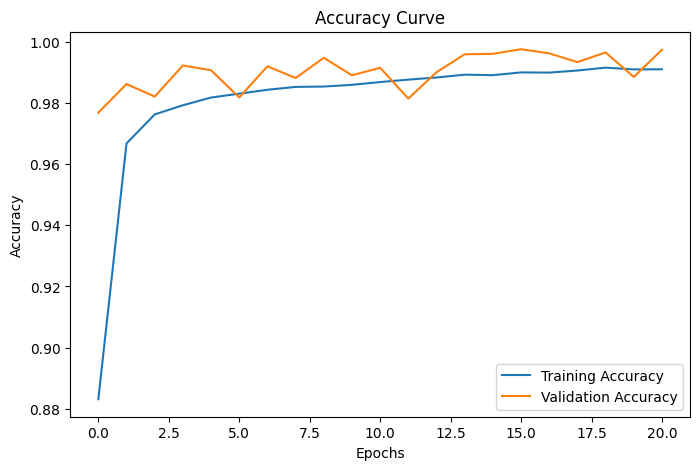

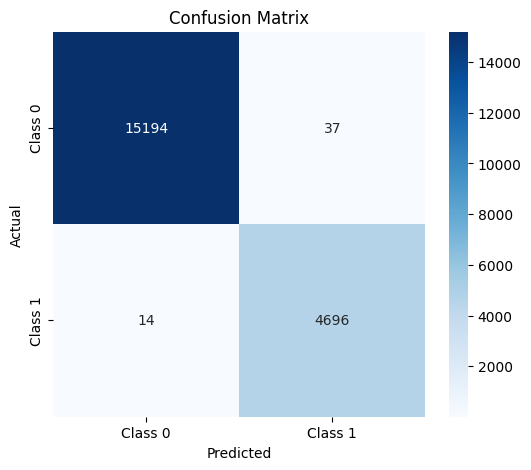

Accuracy: 0.9974
Precision: 0.9922
Recall: 0.9970
F1 Score: 0.9946


In [43]:
# Model 4 - Adam optimizer with L1 regularization and early stopping
model4, callbacks4 = define_model(True, 0.4, 0.0005, num_features, "adam", "l1", 0.01)
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=callbacks4)
loss_curve_plot(history4)
accuracy_curve_plot(history4)
y_pred4 = model4.predict(X_test)
print_confusion_matrix(y_test, y_pred4)

Epoch 1/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9115 - loss: 0.2418 - val_accuracy: 0.9787 - val_loss: 0.0494
Epoch 2/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9791 - loss: 0.0506 - val_accuracy: 0.9803 - val_loss: 0.0389
Epoch 3/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9835 - loss: 0.0417 - val_accuracy: 0.9820 - val_loss: 0.0365
Epoch 4/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9862 - loss: 0.0344 - val_accuracy: 0.9915 - val_loss: 0.0250
Epoch 5/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9877 - loss: 0.0302 - val_accuracy: 0.9902 - val_loss: 0.0260
Epoch 6/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9879 - loss: 0.0309 - val_accuracy: 0.9818 - val_loss: 0.0469
Epoch 7/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0258 - val_accuracy: 0.9959 - val_loss: 0.0202
Epoch 8/50
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9895 - loss: 0.0287 - 

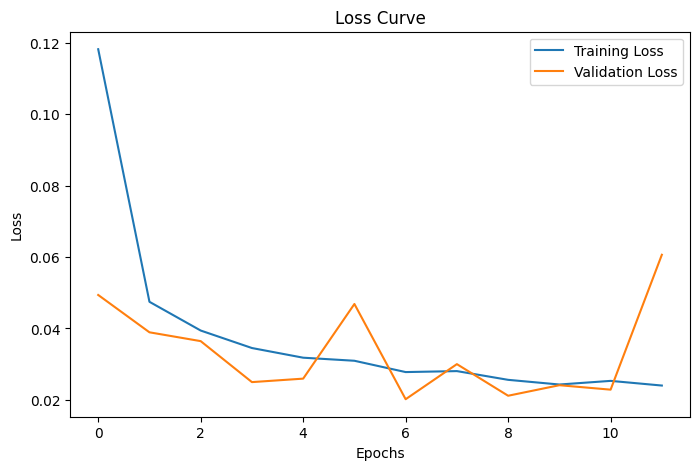

624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step


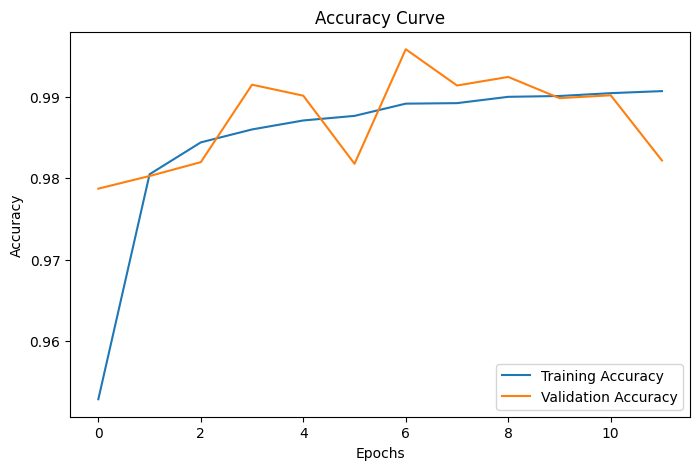

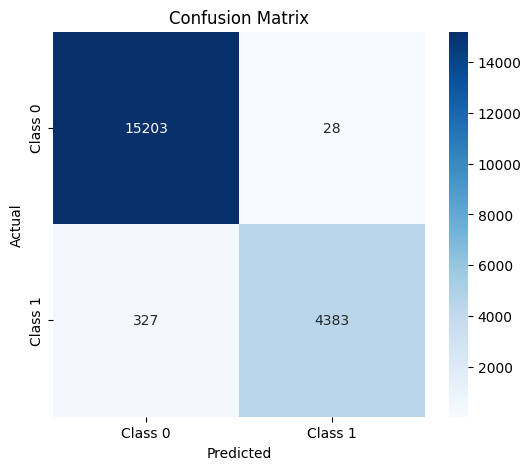

Accuracy: 0.9822
Precision: 0.9937
Recall: 0.9306
F1 Score: 0.9611


In [44]:
# Model 5 - Adagrad optimizer with L2 regularization and early stopping
model5, callbacks5 = define_model(True, 0.1, 0.001, num_features, "adagrad", "l2", 0.01)
history5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=callbacks5)
loss_curve_plot(history5)
accuracy_curve_plot(history5)
y_pred5 = model5.predict(X_test)
print_confusion_matrix(y_test, y_pred5)

Accuracy: 1.0
Confusion Matrix:
 [[15231     0]
 [    0  4710]]


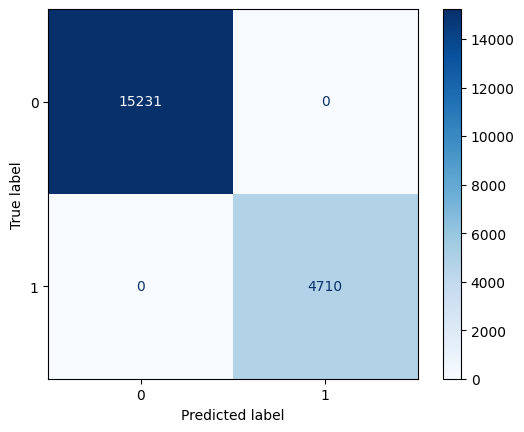

In [45]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Define model and parameters
rf_model = RandomForestClassifier(random_state=42)
param_dist = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True, False],
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model
best_rf_model = random_search.best_estimator_

# Prediction and evaluation
y_pred_rf = best_rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()  # Ensure the plot is displayed


Logistic Regression Accuracy: 0.9193621182488341


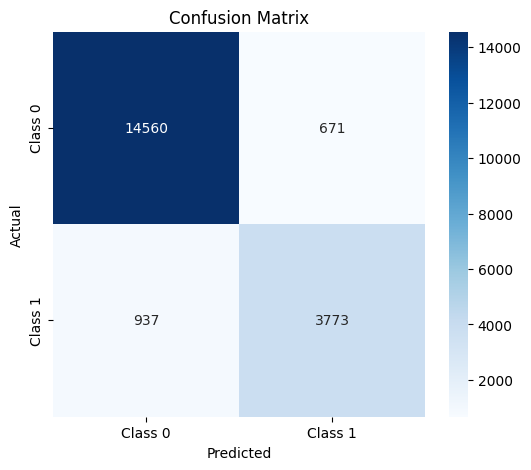

Accuracy: 0.9194
Precision: 0.8490
Recall: 0.8011
F1 Score: 0.8243


In [46]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print_confusion_matrix(y_test, y_pred_log_reg)

In [47]:
import os
from tensorflow.keras import models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
import joblib
import numpy as np

# Initialize variables
models_dict = {}
histories_dict = {}
best_model = None
best_score = float('-inf')  # Start with the lowest possible score

# Populate models_dict with trained models
models_dict['Model 1'] = model1
models_dict['Model 2'] = model2
models_dict['Model 3'] = model3
models_dict['Model 4'] = model4
models_dict['Model 5'] = model5
models_dict['Logistic Regression'] = log_reg
models_dict['Random Forest'] = rf_model

# Regularize the Random Forest model to prevent overfitting
models_dict['Random Forest'] = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limit tree depth
    min_samples_split=10,  # Increase minimum samples for splitting
    min_samples_leaf=5,  # Increase minimum samples at leaf nodes
    random_state=42
)

# Store training histories for Neural Networks
for model_name, model in models_dict.items():
    if isinstance(model, models.Sequential):
        histories_dict[model_name] = model.history  # Assuming models are already trained

# Evaluate and compare models
for model_name, model in models_dict.items():
    print(f"\nEvaluating {model_name}:")

    if isinstance(model, models.Sequential):  # Neural Network
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        val_accuracy = histories_dict[model_name].history.get('val_accuracy', [0])[-1]
        train_accuracy = histories_dict[model_name].history.get('accuracy', [0])[-1]
    else:  # Traditional Models
        # Fit the model if not already trained (e.g., Random Forest)
        if not hasattr(model, 'classes_'):
            model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        val_accuracy = accuracy_score(y_test, y_pred)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))

    # Print classification report and confusion matrix
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)

    # Penalize models with a big gap between train and validation accuracy (overfitting)
    overfit_penalty = abs(train_accuracy - val_accuracy) * 10  # Increased penalty weight
    adjusted_score = (0.8 * val_accuracy + 0.2 * f1) - overfit_penalty  # Weighted score

    # Print adjusted score
    print(f"Adjusted Score: {adjusted_score:.4f}")

    # Update best model
    if adjusted_score > best_score:
        best_score = adjusted_score
        best_model = model

# Create saved_models directory if it doesn't exist
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

# Save all models
for model_name, model in models_dict.items():
    if isinstance(model, models.Sequential):
        model.save(f'saved_models/{model_name}.h5')
    else:
        joblib.dump(model, f'saved_models/{model_name}.pkl')


Evaluating Model 1:
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15231
           1       0.99      0.99      0.99      4710

    accuracy                           0.99     19941
   macro avg       0.99      0.99      0.99     19941
weighted avg       0.99      0.99      0.99     19941

[[15186    45]
 [   56  4654]]
Adjusted Score: 0.1979

Evaluating Model 2:
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15231
           1       0.97      1.00      0.99      4710

    accuracy                           0.99     19941
   macro avg       0.99      0.99      0.99     19941
weighted avg       0.99      0.99      0.99     19941

[[15104   127]
 [   15  4695]]
Adjusted Score: 0.1970

Evaluating Model 3:
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
              precision    recall  f1-score   

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15231
           1       1.00      1.00      1.00      4710

    accuracy                           1.00     19941
   macro avg       1.00      1.00      1.00     19941
weighted avg       1.00      1.00      1.00     19941

[[15231     0]
 [    0  4710]]
Adjusted Score: 1.0000


In [48]:
from tensorflow.keras.models import load_model
import numpy as np

# Define the function to make predictions
def make_predictions(model_path, X):


    model = load_model(model_path)

    # Make predictions (probabilities)
    predictions_proba = model.predict(X)


    if predictions_proba.shape[1] == 1:
        predictions = (predictions_proba >= 0.5).astype(int)
    else:  # Multiclass classification
        predictions = np.argmax(predictions_proba, axis=1)

    return predictions


if __name__ == '__main__':
    # Define the path to the saved model
    model_path = '/content/saved_models/Model 4.h5'


    X = X_test

    # Call the prediction function
    predictions = make_predictions(model_path, X)

    # Print the predictions
    print("Predictions:")
    print(predictions)

624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step
Predictions:
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


In [49]:
import shutil
from google.colab import files

# Step 1: Compress the folder
shutil.make_archive('saved_models', 'zip', 'saved_models')

# Step 2: Download the zip file
files.download('saved_models.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>